# import lib

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# import k2 data

In [110]:
df = pd.read_csv('tabular_data/k2pandc_2025.10.02_20.47.13.csv')
df.head()

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-02-15,1,4,1.0,0,0,0,0,0,0
1,2,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2016-07-28,1,4,1.0,0,0,0,0,0,0
2,3,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-04-26,1,4,1.0,0,0,0,0,0,0
3,4,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-08-02,0,10,1.0,0,0,0,0,0,0
4,5,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-02-15,0,10,1.0,0,0,0,0,0,0


# Eksplorasi dan Pembersihan Data

Nilai unik di kolom 'disposition':
disposition
CONFIRMED         2315
CANDIDATE         1374
FALSE POSITIVE     293
REFUTED             22
Name: count, dtype: int64


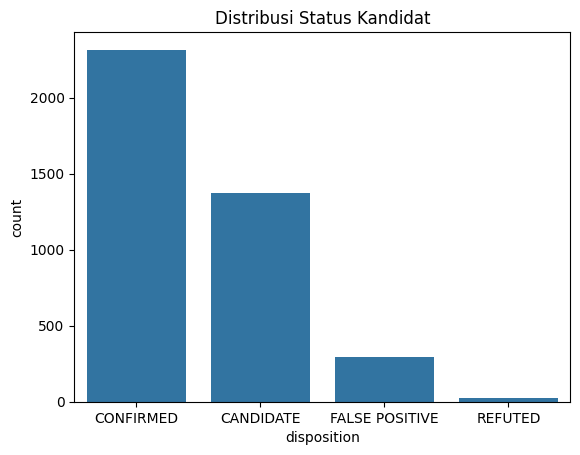

In [111]:
# Cek distribusi variabel target
print("Nilai unik di kolom 'disposition':")
print(df['disposition'].value_counts())

# Visualisasikan distribusi
sns.countplot(x='disposition', data=df)
plt.title('Distribusi Status Kandidat')
plt.show()

In [112]:
# Menangani Data Duplikat berdasarkan 'default_flag'
print(f"Jumlah baris sebelum difilter: {len(df)}")

Jumlah baris sebelum difilter: 4004


## Flag 1 

Jumlah baris setelah difilter dengan default_flag=1: 1806

Distribusi target setelah filter:
disposition
CANDIDATE         976
CONFIRMED         580
FALSE POSITIVE    242
REFUTED             8
Name: count, dtype: int64


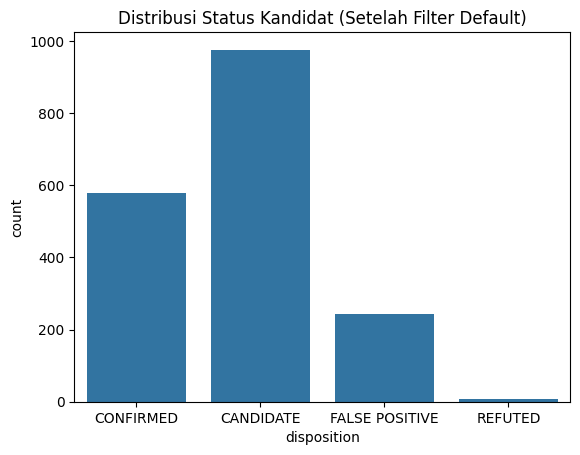

In [113]:
# Filter DataFrame untuk hanya menggunakan baris dengan default_flag = 1
# .copy() digunakan untuk menghindari peringatan 'SettingWithCopyWarning' dari pandas
df_filtered = df[df['default_flag'] == 1].copy()

print(f"Jumlah baris setelah difilter dengan default_flag=1: {len(df_filtered)}")

# Cek ulang distribusi target setelah difilter
print("\nDistribusi target setelah filter:")
print(df_filtered['disposition'].value_counts())
sns.countplot(x='disposition', data=df_filtered)
plt.title('Distribusi Status Kandidat (Setelah Filter Default)')
plt.show()

## Pilih Kolom Yang 

In [ ]:
# Buang kolom-kolom yang tidak relevan untuk pemodelan
# Ini termasuk ID, nama, referensi, dan flag yang tidak informatif
cols_to_drop = [
    'pl_name', 'hostname', 'pl_letter', 'k2_name', 'epic_hostname', 
    'epic_candname', 'hd_name', 'hip_name', 'tic_id', 'gaia_id', 
    'default_flag', 'disp_refname', 'discoverymethod', 
    'disc_refname', 'disc_pubdate', 'disc_locale', 'disc_facility', 
    'disc_telescope','rowid', 'soltype', 'st_refname','rowupdate', 'pl_pubdate','releasedate', 'pl_refname'
]

# Pastikan hanya membuang kolom yang ada di dataframe untuk menghindari error
cols_to_drop_existing = [col for col in cols_to_drop if col in df_filtered.columns]

df_cleaned = df_filtered.drop(columns=cols_to_drop_existing)

print(f"Bentuk data sebelum membuang kolom: {df_filtered.shape}")
print(f"Bentuk data setelah membuang kolom ID/teks: {df_cleaned.shape}")
df_cleaned.head()

Bentuk data sebelum membuang kolom: (1806, 295)
Bentuk data setelah membuang kolom ID/teks: (1806, 272)


,disposition,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,disc_instrument,rv_flag,pul_flag,ptv_flag,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
2,CONFIRMED,1,1,0,0,2016,Kepler CCD Array,1,0,0,...,2018-04-26,1,4,1.0,0,0,0,0,0,0
3,CANDIDATE,1,0,0,0,2018,Kepler CCD Array,0,0,0,...,2018-08-02,0,10,1.0,0,0,0,0,0,0
5,CANDIDATE,1,0,0,0,2016,Kepler CCD Array,0,0,0,...,2015-12-05,0,1,1.0,0,0,0,0,0,0
7,CANDIDATE,1,0,0,0,2018,Kepler CCD Array,0,0,0,...,2018-08-02,0,10,1.0,0,0,0,0,0,0
8,CANDIDATE,1,0,0,0,2019,Kepler CCD Array,0,0,0,...,2019-09-05,0,1,1.0,0,0,0,0,0,0


## Missing Value 

In [115]:
# --- KODE DIAGNOSTIK DAN PERBAIKAN LENGKAP ---

# 1. Buang kolom yang 100% kosong terlebih dahulu
missing_fractions = df_cleaned.isnull().mean()
cols_to_drop_full_nan = missing_fractions[missing_fractions == 1].index
df_cleaned = df_cleaned.drop(columns=cols_to_drop_full_nan).copy()

print(f"Membuang {len(cols_to_drop_full_nan)} kolom yang sepenuhnya kosong.")

# 2. Identifikasi kolom yang masih punya nilai kosong
cols_with_nan = df_cleaned.columns[df_cleaned.isnull().any()].tolist()
print(f"\nDitemukan {len(cols_with_nan)} kolom dengan nilai kosong")
print(f"Total nilai kosong: {df_cleaned.isnull().sum().sum()}")

# 3. DIAGNOSTIK: Cek tipe data dari kolom bermasalah
print("\n--- DIAGNOSTIK: Tipe Data Kolom Bermasalah ---")
for col in cols_with_nan[:10]:  # Tampilkan 10 pertama sebagai contoh
    print(f"{col}: {df_cleaned[col].dtype} | Nilai kosong: {df_cleaned[col].isnull().sum()}")

# 4. Imputasi dengan pendekatan yang lebih kuat
print("\n--- Mulai Imputasi ---")
for col in cols_with_nan:
    if df_cleaned[col].dtype == 'object':
        # Untuk kolom teks, isi dengan string 'Unknown'
        df_cleaned[col] = df_cleaned[col].fillna('Unknown')
        print(f"Kolom '{col}' (teks) diisi dengan 'Unknown'")
    else:
        # Untuk kolom numerik, isi dengan median
        median_val = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_val)

# 5. Konfirmasi akhir
print("\n--- HASIL AKHIR ---")
print(f"Jumlah nilai kosong setelah imputasi: {df_cleaned.isnull().sum().sum()}")
print(f"Bentuk data final: {df_cleaned.shape}")

Membuang 9 kolom yang sepenuhnya kosong.

Ditemukan 226 kolom dengan nilai kosong
Total nilai kosong: 226438

--- DIAGNOSTIK: Tipe Data Kolom Bermasalah ---
pl_orbper: float64 | Nilai kosong: 22
pl_orbpererr1: float64 | Nilai kosong: 392
pl_orbpererr2: float64 | Nilai kosong: 392
pl_orbperlim: float64 | Nilai kosong: 22
pl_orbsmax: float64 | Nilai kosong: 1421
pl_orbsmaxerr1: float64 | Nilai kosong: 1426
pl_orbsmaxerr2: float64 | Nilai kosong: 1426
pl_orbsmaxlim: float64 | Nilai kosong: 1421
pl_rade: float64 | Nilai kosong: 361
pl_radeerr1: float64 | Nilai kosong: 417

--- Mulai Imputasi ---
Kolom 'pl_bmassprov' (teks) diisi dengan 'Unknown'
Kolom 'pl_tsystemref' (teks) diisi dengan 'Unknown'
Kolom 'st_spectype' (teks) diisi dengan 'Unknown'
Kolom 'st_metratio' (teks) diisi dengan 'Unknown'
Kolom 'k2_campaigns' (teks) diisi dengan 'Unknown'

--- HASIL AKHIR ---
Jumlah nilai kosong setelah imputasi: 0
Bentuk data final: (1806, 263)


# Preprare Data dan Model

## Encoding variabel

In [116]:
# Kita akan menyederhanakan masalah: 'CONFIRMED' vs 'FALSE POSITIVE'
# Pertama, kita hanya akan menyimpan baris dengan dua kategori ini
df_model = df_cleaned[df_cleaned['disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()

# Sekarang, ubah teks menjadi angka (1 untuk Planet, 0 untuk Bukan Planet)
df_model['disposition'] = df_model['disposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0)

print("Distribusi target setelah disederhanakan:")
print(df_model['disposition'].value_counts())

Distribusi target setelah disederhanakan:
disposition
1    580
0    242
Name: count, dtype: int64


## Encoding Fitur Kategori

In [117]:
# Pisahkan target (y) dari fitur (X) SEBELUM encoding
X = df_model.drop('disposition', axis=1)
y = df_model['disposition']

# Gunakan pd.get_dummies untuk mengubah semua kolom 'object' menjadi numerik
# Ini akan secara otomatis menemukan semua kolom teks dan mengubahnya
X_encoded = pd.get_dummies(X)

print(f"Bentuk fitur sebelum encoding: {X.shape}")
print(f"Bentuk fitur setelah encoding: {X_encoded.shape}")
print("\nContoh beberapa kolom baru yang dibuat oleh get_dummies:")
# Menampilkan beberapa kolom baru yang mungkin dibuat
new_cols = [col for col in X_encoded.columns if '_' in col and col.startswith('pl_')]
print(X_encoded[new_cols[:5]].head())

Bentuk fitur sebelum encoding: (822, 262)
Bentuk fitur setelah encoding: (822, 1863)

Contoh beberapa kolom baru yang dibuat oleh get_dummies:
    pl_controv_flag  pl_orbper  pl_orbpererr1  pl_orbpererr2  pl_orbperlim
2                 0  41.685500       0.003000      -0.003000           0.0
13                0   6.798700       0.000100      -0.000100           0.0
21                0  28.165600       0.002700      -0.002800           0.0
31                0  50.285869       0.000410      -0.000410           0.0
46                0   2.519386       0.000014      -0.000014           0.0


## Pisahkan Data Latih dan Data Uji

In [118]:
# Kita akan menggunakan 80% data untuk melatih model dan 20% untuk mengujinya
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Ukuran set data:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Ukuran set data:
X_train: (657, 1863)
X_test: (165, 1863)
y_train: (657,)
y_test: (165,)


# Melatih dan Mengevaluasi Model

## Membuat dan Melatih Model

In [119]:
# Membuat instance model
# n_estimators adalah jumlah 'pohon' dalam 'hutan'.
# random_state=42 untuk hasil yang konsisten.
# n_jobs=-1 untuk menggunakan semua core CPU yang tersedia.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Mulai melatih model Random Forest...")
# Melatih model dengan data latih
rf_model.fit(X_train, y_train)
print("Model selesai dilatih.")

Mulai melatih model Random Forest...
Model selesai dilatih.


## Predict dan Eval

In [120]:
# --- 2. Membuat Prediksi pada Data Uji ---
y_pred = rf_model.predict(X_test)

# --- 3. Mengevaluasi Performa Model ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi yang lebih detail
print("\nLaporan Klasifikasi:")
# target_names akan memberi label pada laporan (0=Bukan Planet, 1=Planet)
print(classification_report(y_test, y_pred, target_names=['Bukan Planet', 'Planet']))


Akurasi Model: 100.00%

Laporan Klasifikasi:
              precision    recall  f1-score   support

Bukan Planet       1.00      1.00      1.00        49
      Planet       1.00      1.00      1.00       116

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



## Menampilkan Confusion Matrix


Confusion Matrix:


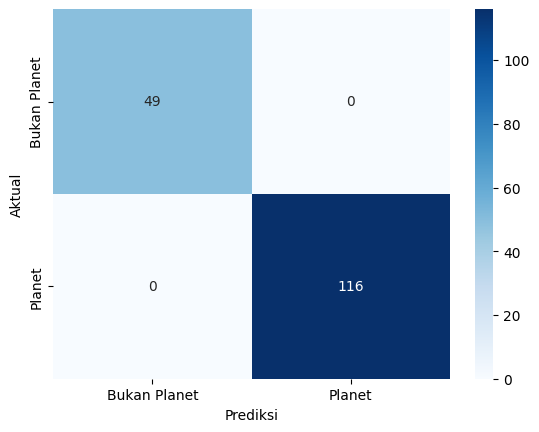

In [121]:
# --- 4. Menampilkan Confusion Matrix ---
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Bukan Planet', 'Planet'], 
            yticklabels=['Bukan Planet', 'Planet'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Candidate Data

## Uji Model Unseen

In [122]:
print("Menyiapkan data 'CANDIDATE'...")

# Ambil baris yang statusnya 'CANDIDATE' dari df_cleaned
df_unseen = df_cleaned[df_cleaned['disposition'] == 'CANDIDATE'].copy()

# Pisahkan fitur dari target (meskipun kita tidak akan menggunakan targetnya)
X_unseen = df_unseen.drop('disposition', axis=1)

# Lakukan one-hot encoding pada data 'unseen'
X_unseen_encoded = pd.get_dummies(X_unseen)

# SANGAT PENTING: Pastikan kolomnya sama persis dengan data latih
# .reindex() akan menyamakan kolom. Kolom baru di data latih akan ditambahkan dan diisi 0.
# Kolom yang tidak ada di data latih akan dibuang.
X_unseen_final = X_unseen_encoded.reindex(columns=X_encoded.columns, fill_value=0)

print(f"Jumlah data 'unseen' (kandidat) yang akan diuji: {len(X_unseen_final)}")
print(f"Bentuk data 'unseen' setelah disiapkan: {X_unseen_final.shape}")
print(f"Bentuk data latih (sebagai perbandingan): {X_train.shape}")

Menyiapkan data 'CANDIDATE'...
Jumlah data 'unseen' (kandidat) yang akan diuji: 976
Bentuk data 'unseen' setelah disiapkan: (976, 1863)
Bentuk data latih (sebagai perbandingan): (657, 1863)


## Predict Pada Kandidat

In [123]:
# --- 2. Membuat Prediksi pada Data Kandidat ---
print("Membuat prediksi pada 976 kandidat...")
unseen_predictions = rf_model.predict(X_unseen_final)

# --- 3. Menganalisis Hasil Prediksi ---
# Ubah hasil prediksi (numpy array) menjadi pandas Series untuk dihitung
prediction_counts = pd.Series(unseen_predictions).value_counts()

print("\nHasil Prediksi untuk Kandidat:")
print(prediction_counts)

# Menambahkan hasil prediksi kembali ke dataframe asli untuk diinspeksi
df_unseen['predicted_disposition'] = unseen_predictions
# Mengubah 0 dan 1 kembali menjadi label teks agar mudah dibaca
df_unseen['predicted_label'] = df_unseen['predicted_disposition'].apply(lambda x: 'Planet' if x == 1 else 'Bukan Planet')

print("\nContoh beberapa kandidat beserta hasil prediksinya:")
# Mengganti 'k2_name' dengan 'epic_candname' yang lebih relevan untuk kandidat
display(df_unseen[['predicted_label']].join(df_filtered['epic_candname']).head(10))

Membuat prediksi pada 976 kandidat...

Hasil Prediksi untuk Kandidat:
0    497
1    479
Name: count, dtype: int64

Contoh beberapa kandidat beserta hasil prediksinya:


,predicted_label,epic_candname
3,Planet,EPIC 201111557.01
5,Bukan Planet,EPIC 201126503.01
7,Planet,EPIC 201127519.01
8,Planet,EPIC 201147085.01
9,Planet,EPIC 201152065.01
10,Bukan Planet,EPIC 201160662.01
11,Planet,EPIC 201164625.01
12,Planet,EPIC 201166680.01
14,Bukan Planet,EPIC 201176672.01
15,Bukan Planet,EPIC 201176672.02


# Analisis dan Pahami Model

## Tingkat Kepentingan

In [124]:
# --- 1. Mendapatkan dan Mengurutkan Tingkat Kepentingan Fitur ---
importances = rf_model.feature_importances_
feature_names = X_encoded.columns

# Membuat DataFrame untuk analisis yang lebih mudah
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Mengurutkan fitur dari yang paling penting
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("DataFrame 'feature_importance_df' telah dibuat dan diurutkan.")
print("Menampilkan 5 fitur teratas:")
display(feature_importance_df.head(5))

DataFrame 'feature_importance_df' telah dibuat dan diurutkan.
Menampilkan 5 fitur teratas:


,feature,importance
1,sy_pnum,0.097968
26,pl_radeerr2,0.046593
1775,releasedate_2019-02-26,0.044149
370,pl_refname_<a refstr=YU_ET_AL__2018 href=https...,0.042457
420,st_metratio_[Fe/H],0.035360
